# Esercitazione 8
L'esercitazione 8 richiede di implementare metodi Monte Carlo variazionali per valutare l'energia di ground state per una particella quantistica soggetta ad un potenziale unidimensionale $V(x)=x^4-\cfrac{5}{2}x^2$; in particolare, si richiede di calcolare i parametri $\mu$ e $\sigma$ della funzione d'onda della particella nel ground state attraverso un algoritmo di _Simulated Annealing_. Ho riportato la soluzione numerica approssimata per poter istituire confronti con i valori calcolati dal codice.

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color_palette = sns.color_palette("bright")

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

Ground state energy:  -0.46046587969271563


## Esercizio 8.2
Ho ottimizzato i parametri $\mu$ e $\sigma$ della funzione d'onda del ground state di prova $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ attraverso un algoritmo di _Simulated Annealing_, partendo da due valori scelti randomicamente in $[0,1)$. e li ho fatti variare L'algoritmo evolve con due Metropolis annidati: il più interno campiona e calcola il valore dell'energia di ground state $ \langle {\hat H} \rangle_T = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} $ per una data $\mu$ e $\sigma$; il più esterno esplora lo spazio dei parametri accettando mosse di passo $1/\beta$ secondo la probabilità data dal peso di Boltzmann $e^{-\beta\langle { \hat H} \rangle}$, con $\langle {\hat H} \rangle$ calcolata di volta in volta per i parametri $\mu$ e $\sigma$. $\beta$ evolve nel range $[1,1000]$ con passo $3$, diminuendo progressivamente la lunghezza delle mosse nello spazio dei parametri e restringendo lo spazio dei parametri esplorabile (l'effetto equivalente al raffreddamento di un sistema di temperatura $T=1/\beta$). Anche il numero di mosse tentate diminuisce progressivamente come $10^3/\log_{10}(1+\beta)$. Dopo aver trovato i parametri $\mu$ e $\sigma$, ho calcolato il valore dell'energia di ground state campionando $M=10^5$ punti con l'algoritmo di Metropolis.

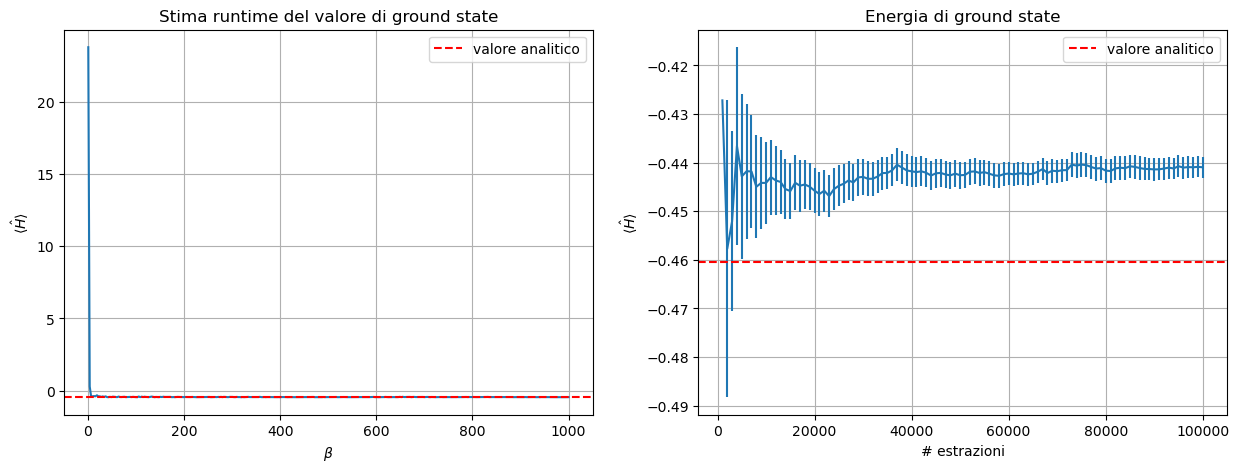

In [12]:
beta, ene = np.loadtxt("risultati/Beta.dat",usecols=(0,1), delimiter=',', unpack='true') 
x1, sum, error = np.loadtxt("risultati/Energy.dat", usecols=(0,1,2), delimiter=',', unpack='true')


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

ax0.plot(beta, ene)
ax0.axhline(y=E[0], color='r', ls='--', label='soluzione numerica')
ax0.set_title('Stima runtime del valore di ground state')
ax0.set_ylabel(r'$\langle \hat{H} \rangle$')
ax0.set_xlabel(r'$\beta$')
ax0.grid(True)
ax0.legend()

ax1.set_title('Energia di ground state')
ax1.errorbar(x1,sum,yerr=error)
ax1.axhline(y=E[0], color='r', ls='--', label='soluzione numerica')
ax1.set_ylabel(r'$\langle \hat{H} \rangle$')
ax1.set_xlabel('# estrazioni')
ax1.grid(True)
ax1.legend()

plt.show()

L'algoritmo di _Simulated Annealing_ converge rapidamente al valore $\langle \hat{H} \rangle \approx 0.44$, che tuttavia non è compatibile con la soluzione analitica. La soluzione numerica non va tuttavia considerata come la soluzione esatta, dato che è ottenuta approssimando le derivate. È comunque possibile che la simulazione si sia raffreddata troppo velocemente, rimanendo in un minimo locale (come si può supporre dal fatto che il valore dell'energia calcolato è più alto di quello numerico). La convergenza è altrettanto rapida ai valori dei parametri $\mu\simeq 0.8$ e $\sigma\simeq 0.6$.   

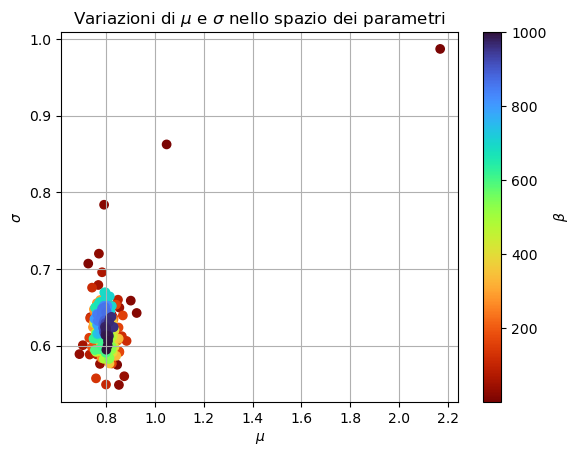

In [13]:
beta, mu, sigma= np.loadtxt("risultati/Parameters.dat", usecols=(0, 1, 2), unpack='true', delimiter=",")
plt.scatter(mu, sigma, c=beta, cmap='turbo_r')
plt.colorbar(label=r"$\beta$", orientation="vertical")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.grid()
plt.title(r"Variazioni di $\mu$ e $\sigma$ nello spazio dei parametri")
plt.show()

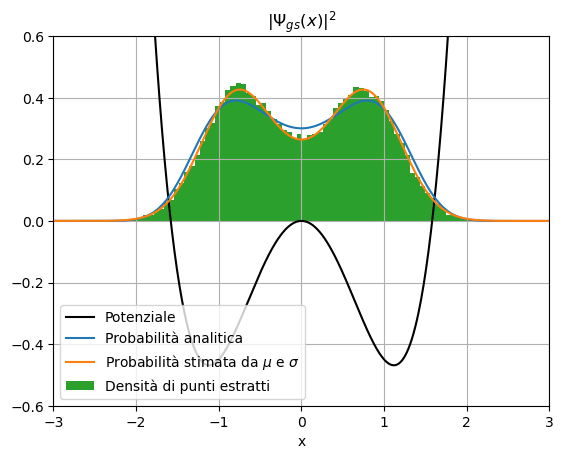

In [14]:
#plt.figure(figsize=(8,5))
func = np.loadtxt("risultati/Psi.dat", usecols=(1), unpack='true', delimiter=',')
scale = 0.3
y = np.exp(-0.5*((x-mu[-1])/sigma[-1])**2)+np.exp(-0.5*((x+mu[-1])/sigma[-1])**2)
plt.plot(x, scale*V, color="Black", label="Potenziale") # plot the potential
plt.plot(x,(psi[0])**2,label="Probabilità analitica")
plt.plot(x,(y*0.634)**2,label="Probabilità stimata da $\mu$ e $\sigma$") #il coefficiente è la normalizzazione
plt.hist(func,bins='auto', density=1, label='Densità di punti estratti')
plt.title("$|\Psi_{gs}(x)|^2$")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()


La densità di probabilità estratta dalla simulazione è simile alla $|\Psi|^2$ calcolata analiticamente, ma presenta massimi e minimi più pronunciati. I punti estratti nella stima finale dell'energia ricalcano invece molto bene la distribuzione data da $|\Psi^{\mu, \sigma}|^2$.